In [1]:
import pandas as pd
import os

from optimizer import FW
from utils import process_dataset, plot_hisotry

# Armijo line search

In [2]:
stepsize_strategy='armijo'

## Instance 1: Johnson8-2-4

In [8]:
dataset = "johnson8-2-4"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [9]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()

for seed in range(50):
    print(seed)
    for variant in variants:
        fw = FW(variant=variant, 
                stepsize_strategy = 'armijo', 
                ssc_procedure=False)
        fw.optimize(complement_hyperedges, n, seed=seed)
        df_current = pd.DataFrame(fw.history)
        df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))

        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0
1
2
3
4
5
6
7
global step
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
global step
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
global step
41
42
global step
43
44
45
46
global step
47
48
global step
49


### Aggregated results over 50 runs

In [11]:
df_final = df[['Variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'seed']).max().reset_index()
df_final[['Variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant']).agg(['max','mean', 'std'])

iteration                     cpu_time                     max_clique   
              max    mean        std       max      mean       std        max   
Variant                                                                         
AFW            48   43.16   2.526270  1.527528  1.005555  0.148448          6  \
BPFW           45   37.62   2.791313  1.247702  0.750677  0.117477          6   
FW            171  116.90  20.527980  9.105962  6.088209  1.239567          6   
PFW            45   37.82   2.730702  1.173818  0.756058  0.122743          6   

                         
         mean       std  
Variant                  
AFW      6.00  0.000000  
BPFW     5.98  0.141421  
FW       6.00  0.000000  
PFW      5.98  0.141421

### Plotting the results for some seed

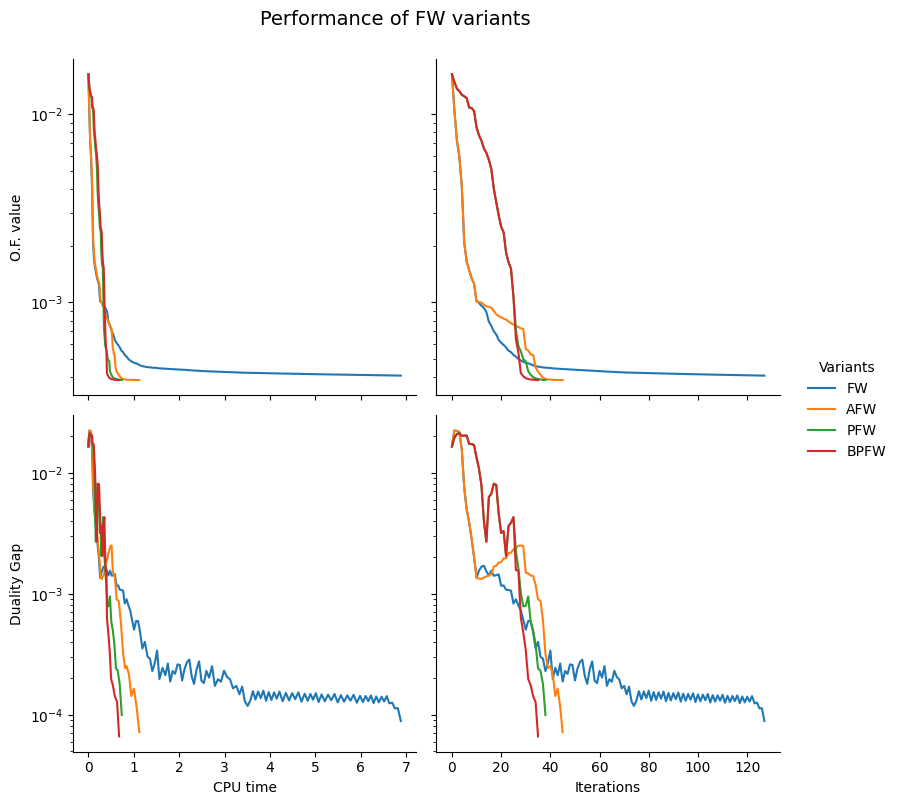

In [12]:
plot_hisotry(df, 48)

## Instance 2: Hamming6-2

In [19]:
dataset = "hamming6-2"
tolerance = 1e-5

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 630016, 5360)

In [20]:
variants = ["FW", "AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    for variant in variants:
        print(seed, variant)
        fw = FW(variant=variant, ssc_procedure=False, stepsize_strategy='armijo', tolerance=tolerance)
        fw.optimize(complement_hyperedges, n, seed=seed)

        # save the results into a dataframe
        df_current = pd.DataFrame(fw.history)
        df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
        df_current['seed'] = pd.Series([seed] * len(df_current))
        max_clique = (fw.x > 0.001).sum()
        df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
        df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0 FW
0 AFW
0 PFW
0 BPFW
global step
global step
1 FW
1 AFW
1 PFW
1 BPFW
2 FW
2 AFW
2 PFW
2 BPFW
global step
3 FW
3 AFW
3 PFW
3 BPFW
global step
4 FW
4 AFW
4 PFW
4 BPFW
5 FW
5 AFW
5 PFW
5 BPFW
global step
global step
6 FW
6 AFW
6 PFW
6 BPFW
7 FW
7 AFW
7 PFW
7 BPFW
8 FW
8 AFW
8 PFW
8 BPFW
global step
9 FW
9 AFW
9 PFW
9 BPFW
global step
global step
10 FW
10 AFW
10 PFW
10 BPFW
11 FW
11 AFW
11 PFW
11 BPFW
global step
12 FW
12 AFW
12 PFW
12 BPFW
13 FW
13 AFW
13 PFW
13 BPFW
global step
global step
14 FW
14 AFW
14 PFW
14 BPFW
global step
15 FW
15 AFW
15 PFW
15 BPFW
global step
16 FW
16 AFW
16 PFW
16 BPFW
17 FW
17 AFW
17 PFW
17 BPFW
global step
18 FW
18 AFW
18 PFW
18 BPFW
19 FW
19 AFW
19 PFW
19 BPFW
global step
global step
global step
20 FW
20 AFW
20 PFW
20 BPFW
global step
global step
21 FW
21 AFW
21 PFW
21 BPFW
22 FW
22 AFW
22 PFW
22 BPFW
23 FW
23 AFW
23 PFW
23 BPFW
global step
global step
24 FW
24 AFW
24 PFW
24 BPFW
25 FW
25 AFW
25 PFW
25 BPFW
global step
26 FW
26 AFW
26 PFW
26 BPFW
global s

### Aggregated resuts over 50 runs

In [21]:
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'seed']).max().reset_index()
df_final[['Variant', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant']).agg(['max','mean', 'std'])

iteration                     cpu_time                     max_clique   
              max    mean        std       max      mean       std        max   
Variant                                                                         
AFW           101   77.32  14.174481  1.895992  1.040304  0.310250         32  \
BPFW           75   61.12   5.524122  0.767298  0.556433  0.073478         32   
FW            166  128.48  16.415821  4.477836  3.443019  0.520188         32   
PFW            76   60.52   5.970130  0.802083  0.542847  0.082314         32   

                          
          mean       std  
Variant                   
AFW      26.84  2.359177  
BPFW     26.64  1.625812  
FW       25.98  1.659727  
PFW      26.58  1.604712

### Plotting the results for some seed

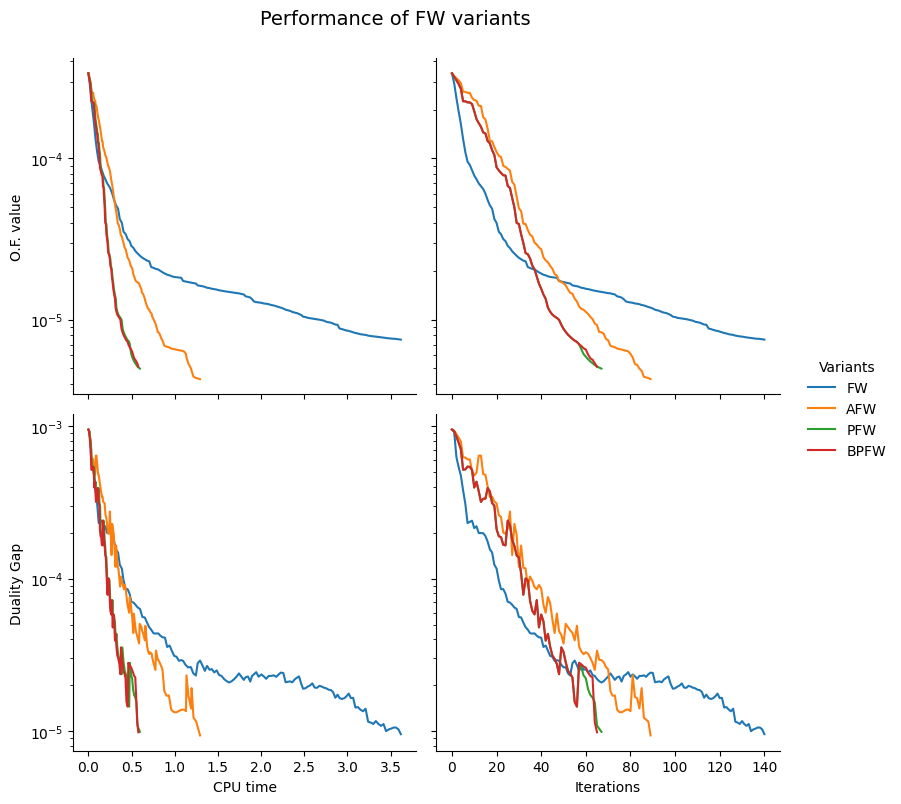

In [22]:
plot_hisotry(df, 9)

# SSC procedure with backtracking line search

In [11]:
stepsize_strategy = 'backtracking'

## Instance 1: Johnson8-2-4

In [121]:
dataset = "johnson8-2-4"
n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(28, 10185, 10290)

In [13]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    print(seed)
    for variant in variants:
        for ssc in [True, False]:
            fw = FW(variant=variant, 
                    stepsize_strategy = stepsize_strategy, 
                    ssc_procedure=ssc,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))

            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0
1
2
3
4
5
6
global step
7
global step
8
9
global step
10
11
12
13
14
15
16
17
18
19
20
21
22
23
global step
24
25
26
27
28
29
30
31
32
33
global step
34
35
global step
36
37
38
39
global step
40
global step
41
42
global step
43
44
45
46
global step
47
48
global step
49


In [38]:
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                    cpu_time                       
                    max   mean        std       max      mean       std   
Variant SSC                                                               
AFW     False        86  55.60  11.724734  1.203266  0.795499  0.189250  \
        True         19  15.40   1.905952  1.137395  0.736860  0.167355   
BPFW    False        78  50.16  10.960709  1.026868  0.712979  0.146569   
        True         17  13.04   2.079639  0.950031  0.632584  0.126348   
PFW     False        78  50.18  10.981785  1.114256  0.708451  0.168512   
        True         17  13.12   2.096060  0.930110  0.620576  0.115857   

              max_clique                  
                     max  mean       std  
Variant SSC                               
AFW     False          6  5.98  0.141421  
        True           7  6.02  0.141421  
BPFW    False          6  5.98  0.141421  
        True           6  5.86  0.350510  
PFW     False          6  5.98  0.141421  
        True           6  5.86  0.350510

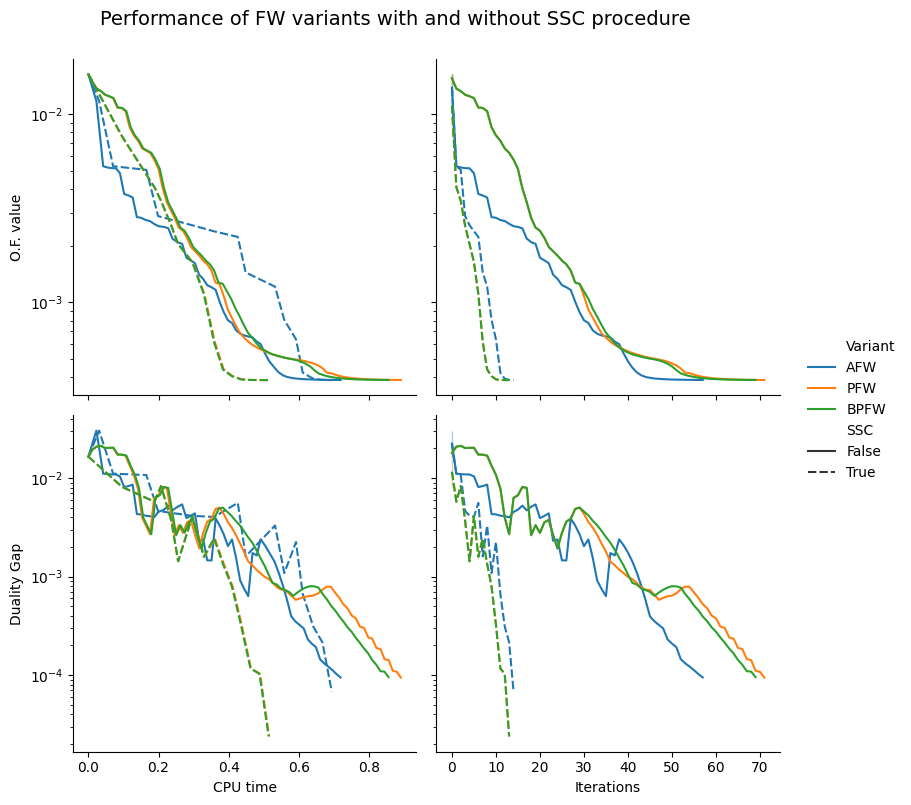

In [40]:
plot_hisotry(df, 48, True)

## Instance 2: Hamming6-2

In [112]:
dataset = "hamming6-2"
tolerance = 1e-5

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 630016, 5360)

In [15]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(50):
    print(seed)
    for variant in variants:
        for ssc in [True, False]:
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc,
                    linesearch_args={'L': 0.01},
                    tolerance=tolerance)
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))

            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])

dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0
global step
1
2
global step
global step
3
4
global step
5
global step
global step
6
7
8
global step
global step
9
global step
global step
10
11
global step
global step
12
global step
global step
13
global step
global step
14
global step
global step
15
global step
global step
global step
16
17
global step
global step
18
global step
global step
19
global step
global step
20
global step
global step
21
global step
22
global step
global step
23
global step
global step
global step
24
25
global step
global step
26
global step
global step
global step
27
global step
28
global step
global step
global step
global step
29
30
31
32
33
global step
global step
global step
34
global step
global step
global step
global step
35
36
global step
global step
global step
37
38
39
global step
40
41
global step
global step
global step
global step
global step
global step
42
global step
global step
global step
43
global step
44
global step
global step
global step
global step
global step
global step
global step

In [119]:
dir = f'results/{stepsize_strategy}/{dataset}'
df = pd.read_csv(dir+'/runs.csv')
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                     cpu_time                       
                    max    mean        std       max      mean       std   
Variant SSC                                                                
AFW     False       348  173.20  54.295488  2.298267  1.253035  0.383882  \
        True        214  122.90  30.823560  2.403847  1.344901  0.331954   
BPFW    False       228  123.80  29.702608  1.584657  0.902699  0.247643   
        True        163   89.64  26.752654  1.786254  1.045462  0.265588   
PFW     False       182  113.18  21.546049  1.521841  0.863157  0.222177   
        True        119   80.92  18.631595  1.591981  0.982119  0.254637   

              max_clique                   
                     max   mean       std  
Variant SSC                                
AFW     False         32  25.64  2.164274  
        True          32  26.10  2.314550  
BPFW    False         32  26.56  1.786114  
        True          32  26.64  1.859998  
PFW     False         32  26.62  1.817040  
        True          32  26.78  2.023232

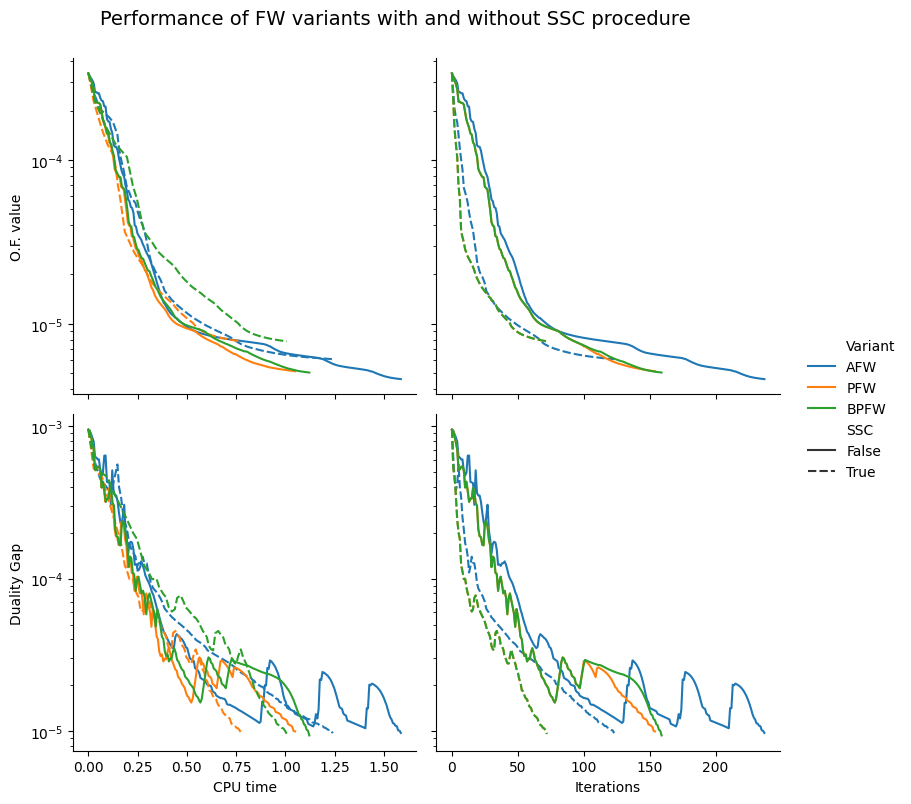

In [117]:
plot_hisotry(df, seed=9, ssc=True)

## Instance 3: Hamming6-4

In [21]:
dataset = "hamming6-4"
tolerance = 1e-4

n, hyperedges, complement_hyperedges = process_dataset(dataset, 4)
n, len(hyperedges), len(complement_hyperedges)

(64, 61776, 573600)

In [22]:
variants = ["AFW", "PFW", "BPFW"]
df = pd.DataFrame()
for seed in range(10):
    for variant in variants:
        for ssc in [True, False]:
            print(seed, variant, ssc)
            fw = FW(variant=variant, 
                    stepsize_strategy = 'backtracking', 
                    ssc_procedure=ssc, 
                    tolerance=tolerance,
                    linesearch_args={'L': 0.01})
            fw.optimize(complement_hyperedges, n, seed=seed)
            df_current = pd.DataFrame(fw.history)
            df_current['Variant'] = pd.Series([fw.variant] * len(df_current))
            df_current['SSC'] = pd.Series([ssc] * len(df_current))
            df_current['seed'] = pd.Series([seed] * len(df_current))
            max_clique = (fw.x > 0.001).sum()
            df_current['max_clique'] = pd.Series([max_clique] * len(df_current))
            df = pd.concat([df, df_current])
            
dir = f'results/{stepsize_strategy}/{dataset}'
os.makedirs(dir, exist_ok=True)
df.to_csv(dir + '/runs.csv', index=False)

0 AFW True
0 AFW False
0 PFW True
0 PFW False
0 BPFW True
global step
global step
0 BPFW False
global step
1 AFW True
1 AFW False
1 PFW True
1 PFW False
1 BPFW True
global step
1 BPFW False
2 AFW True
2 AFW False
2 PFW True
2 PFW False
2 BPFW True
2 BPFW False
global step
3 AFW True
3 AFW False
3 PFW True
3 PFW False
3 BPFW True
global step
3 BPFW False
4 AFW True
4 AFW False
4 PFW True
4 PFW False
4 BPFW True
global step
4 BPFW False
5 AFW True
5 AFW False
5 PFW True
5 PFW False
5 BPFW True
5 BPFW False
6 AFW True
6 AFW False
6 PFW True
6 PFW False
6 BPFW True
6 BPFW False
global step
7 AFW True
7 AFW False
7 PFW True
7 PFW False
7 BPFW True
global step
7 BPFW False
8 AFW True
8 AFW False
8 PFW True
8 PFW False
8 BPFW True
8 BPFW False
9 AFW True
9 AFW False
9 PFW True
9 PFW False
9 BPFW True
global step
9 BPFW False


In [72]:
df.loc[df.cpu_time > 0, 'iteration'] = df.iteration + 1

In [111]:
df = pd.read_csv(dir + '/runs.csv')
df_final = df[['Variant', 'SSC', 'seed', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC', 'seed']).max().reset_index()
df_final[['Variant', 'SSC', 'iteration', 'cpu_time', 'max_clique']].groupby(['Variant', 'SSC']).agg(['max','mean', 'std'])

iteration                      cpu_time                         
                    max   mean        std         max       mean        std   
Variant SSC                                                                   
AFW     False       144   97.9  18.320905  121.974014  83.274671  15.397293  \
        True         25   20.4   2.716207   88.412159  73.887364   9.354124   
BPFW    False       109   99.9   6.919377   99.032608  86.195813   7.366817   
        True         17   15.0   1.154701   56.428850  52.182504   2.835055   
PFW     False       109  100.1   7.171704   93.549900  85.437182   6.168179   
        True         18   15.4   1.577621   57.036703  52.944025   3.486178   

              max_clique            
                     max mean  std  
Variant SSC                         
AFW     False          6  6.0  0.0  
        True           6  6.0  0.0  
BPFW    False          6  6.0  0.0  
        True           6  6.0  0.0  
PFW     False          6  6.0  0.0  
        True           6  6.0  0.0

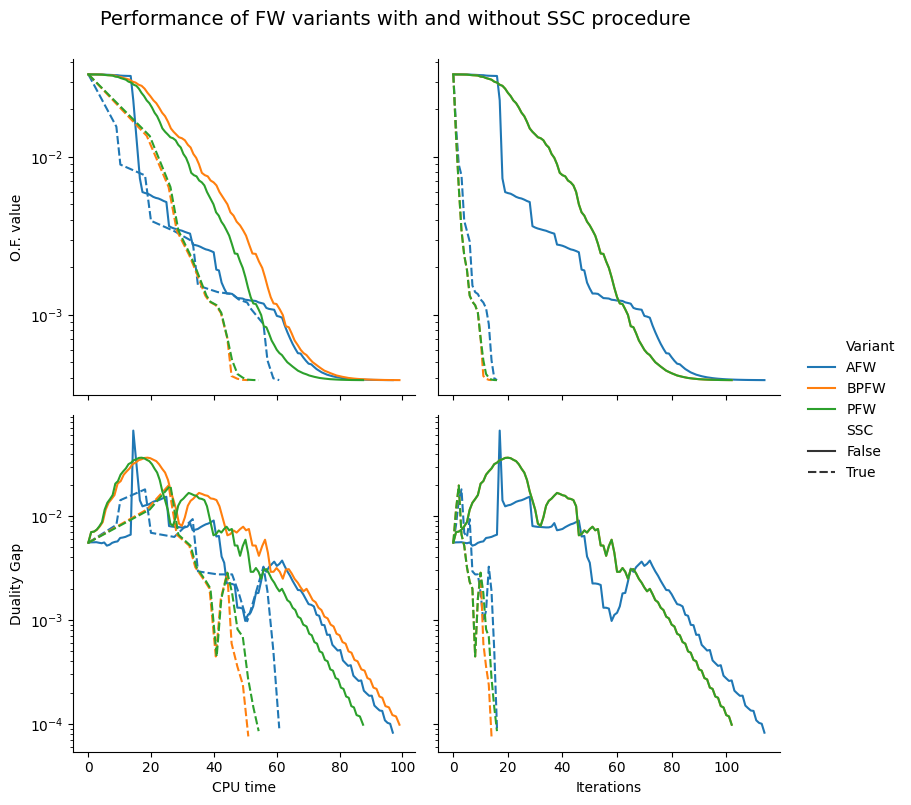

In [109]:
plot_hisotry(df, seed=1, ssc=True)